<a href="https://colab.research.google.com/github/AlecTraas/computational-geo-lab/blob/main/Colab/Ridge/GiftWrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd

In [26]:
numPoints = 10

In [39]:
points = np.random.rand(numPoints,2)*20-10

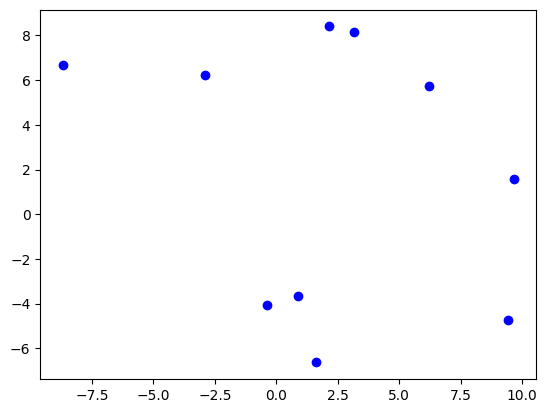

In [28]:
plt.scatter(points[:, 0], points[:, 1], c='blue')

In [29]:
hull = np.array([])

In [30]:
minx = points[0][0]
rootIndex = 0
for i in range(1,len(points)):
  if points[i][0] < minx:
    minx = points[i][0]
    minIndex = i
root = points[minIndex]
hull = np.append(hull, root)

In [31]:
def calcSlope(point1, point2):
  return np.divide((point2[1]-point1[1]),(point2[0]-point1[0]))

In [32]:
def recursiveGiftWrap(point,_root):
  global hull, points
  if point.all() == _root.all():
    hull = np.append(hull, _root)
    return
  nextIndex = findNextIndex(point)
  nextPoint = points[nextIndex]
  hull = np.append(hull, nextPoint)
  points = np.delete(points, nextIndex)
  recursiveGiftWrap(nextPoint,_root)
  return


In [33]:
def findNextIndex(curPoint):
  maxSlope = calcSlope(curPoint,points[0])
  nextIndex = 0
  for i in range(1,len(points)):
    slope = calcSlope(curPoint, points[i])
    if slope >= maxSlope:
      maxSlope = slope
      nextIndex = i
  return nextIndex



In [34]:
def rootFindNextIndex(curPoint):
  nonRoot = int(not rootIndex) #0 if root is not at 0; 1 if root is at 0
  maxSlope = calcSlope(curPoint,points[nonRoot])
  nextIndex = nonRoot
  for i in range(nonRoot,len(points)):
    if i == rootIndex:
      continue
    slope = calcSlope(curPoint, points[i])
    if slope >= maxSlope:
      maxSlope = slope
      nextIndex = i
  return nextIndex

In [35]:
nextIndex = rootFindNextIndex(root)
nextPoint = points[nextIndex]
hull = np.append(hull, points[nextIndex])
points = np.delete(points, nextIndex)
recursiveGiftWrap(nextPoint,root)

<ipython-input-31-6d09ccbaf3fe>:2: RuntimeWarning: invalid value encountered in divide
  return np.divide((point2[1]-point1[1]),(point2[0]-point1[0]))


In [36]:
#plt.plot(hull[:, 0], hull[:, 1], c='blue')